In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Distgen Check

<disgten.Generator with input: 
n_particle: 20000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0
  sigma_xy:
    units: um
    value: 100
  type: rsg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 5
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: fs
    value: 25
  type: sg
total_charge:
  units: fC
  value: 16

>


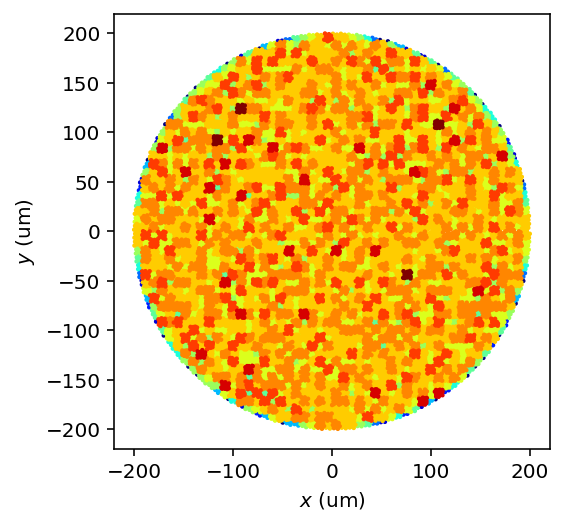

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_2d, plot_1d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE)
print(gen)
beam = gen.beam()

units = {"x":"um","y":"um","px":"eV/c","py":"eV/c","t":"fs","q":"pC"}
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=50,axis="equal");

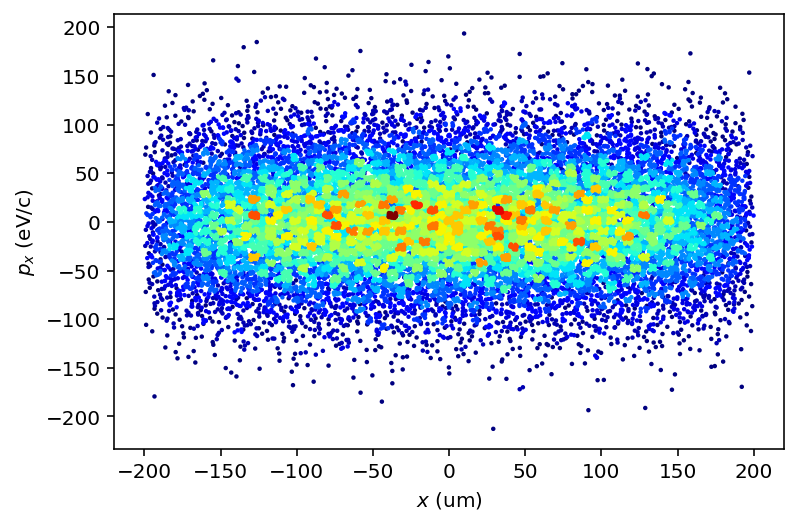

In [3]:
plot_2d(beam,1,"x",units["x"],"px",units["px"],'scatter_hist2d',nbins=75);

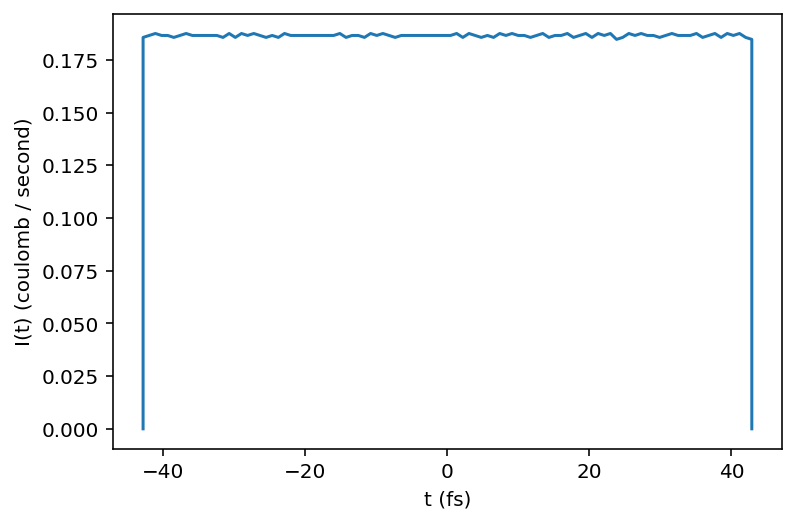

In [4]:
plot_current_profile(beam,1,units)

# Run GPT with Distgen

Its often useful to run the GPT input file without setting anything, just to make sure there are no syntax errors in the file.  

In [5]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [18]:
GPT_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')

PC1 = 1000
PC2 = 1000

settings={'n_particle':200, 
          'PC1':PC1,
          'PC10':PC1,
          'PC2':PC2,
          'PC20':PC2
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True)
print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------
Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp6zyf58hp/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 16.000 fC.
   Number of macroparticles: 200.
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = inf
      Assuming cylindrical symmetry...
   t distribution:    px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 50.547 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 50.547 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 50.547 eV/c
   Scaling sigma_x -> 100.000 µm
   Shifting avg_x -> 0.000 m
   Scaling sigma_y -> 100.000 µm
   Shifting avg_y -> 0.

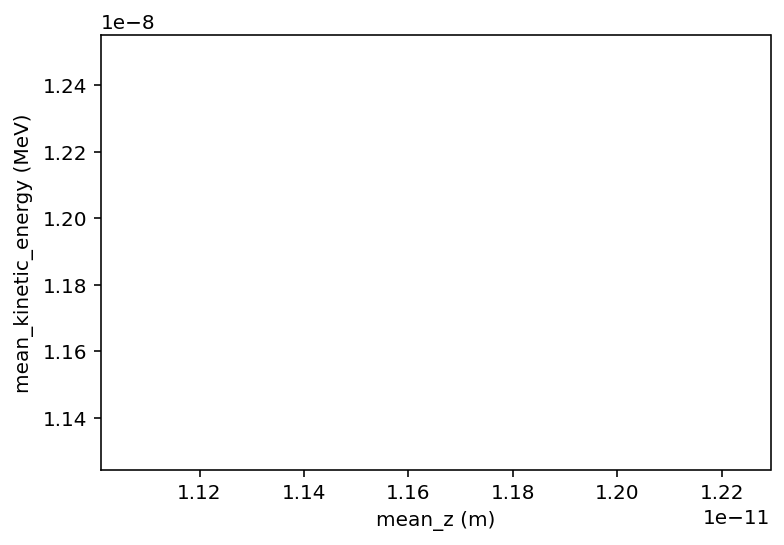

In [19]:
key1 = 'mean_z'
key2 = 'mean_kinetic_energy'
dat1 = G.stat(key1)
dat2 = G.stat(key2)/1e6
units1 = G.stat_units(key1)
units2 = G.stat_units(key2)

fig, ax = plt.subplots()
ax.plot(dat1, dat2)
ax.set_xlabel(key1+f' ({units1})');
ax.set_ylabel(key2+f' (MeV)');

# Run GPT with Distgen and energy gain cavity auto phasing


In [30]:
PC1 = 10e6
PC2 = 10e6

settings={'n_particle':200, 
          'PC1':PC1,
          'PC10':PC1,
          'PC2':PC2,
          'PC20':PC2
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         auto_phase=True,
                         verbose=True,
                         gpt_verbose=False)

print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------
Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpa9g5qsbf/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 16.000 fC.
   Number of macroparticles: 200.
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = inf
      Assuming cylindrical symmetry...
   t distribution:    px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 50.547 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 50.547 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 50.547 eV/c
   Scaling sigma_x -> 100.000 µm
   Shifting avg_x -> 0.000 m
   Scaling sigma_y -> 100.000 µm
   Shifting avg_y -> 0.

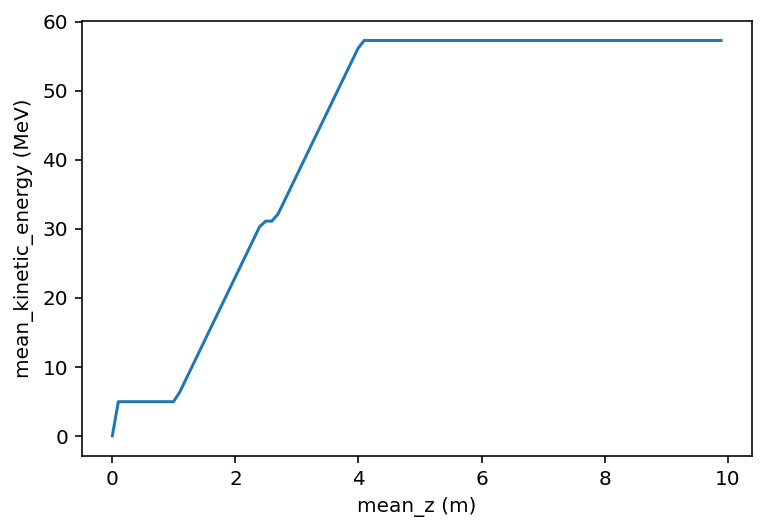

In [31]:
fig, ax = plt.subplots()
ax.plot(G.stat('mean_z'), G.stat('mean_kinetic_energy')/1e6)
ax.set_xlabel(key1+f' (m)');
ax.set_ylabel(key2+f' (MeV)'); 